# Decision Tree Example

In [6]:
using PyPlot
using ScikitLearn
using ScikitLearn.Utils: meshgrid
@sk_import datasets: make_moons

include("../src/decisiontree.jl")

giniindex (generic function with 1 method)

## `ClassificationTree`

In [7]:
X = [[1.0 1.0]; [2.0 1.5]; [3.0 1.7]; [4.0 2.0];[5.0 3.5]; [6.0 4.0]; [7.0 4.5]]
y = [0, 0, 1, 1, 1, 0, 0]

7-element Array{Int64,1}:
 0
 0
 1
 1
 1
 0
 0

In [8]:
cls_tree = ClassificationTree(X, y, giniindex, TreeStoppingRule(3, 1))

ClassificationTree(ClassificationNode(1, false, nothing, nothing, 1, 2.5, ClassificationNode(2, true, 1, 0, nothing, nothing, nothing, nothing), ClassificationNode(2, false, nothing, nothing, 1, 5.5, ClassificationNode(3, true, 2, 1, nothing, nothing, nothing, nothing), ClassificationNode(3, true, 3, 0, nothing, nothing, nothing, nothing))), giniindex, TreeStoppingRule(3, 1), 3)

In [9]:
predict(cls_tree, X)

7-element Array{Int64,1}:
 0
 0
 1
 1
 1
 0
 0

### Test on moon data

In [10]:
X, y = make_moons(300, noise=0.2)

([2.3317457784462605 0.5535752151306628; 0.3818772191909632 -0.08379585574382971; … ; 0.4443431904024201 -0.645352498579011; 0.4235385618814099 -0.5341079388385613], [1, 1, 0, 0, 1, 0, 1, 0, 0, 0  …  1, 0, 0, 0, 0, 1, 0, 1, 1, 1])

In [11]:
function plot_result(tree_model, X, y)
    xx1 = range(minimum(X[:, 1]), maximum(X[:, 1]), length=101)
    xx2 = range(minimum(X[:, 2]), maximum(X[:, 2]), length=100)
    xxx1, xxx2 = meshgrid(xx1, xx2)
    Xtest = vcat([[x1 x2] for x1 in xx1 for x2 in xx2]...)

    yhat = predict(tree_model, Xtest);
    # julia reshape is column-major (1st dim is the dim of column)
    yhat_2d = reshape(yhat, (length(xx2), length(xx1)));

    plot(X[y.==1, 1], X[y.==1, 2], "o", label="1")
    plot(X[y.==0, 1], X[y.==0, 2], "o", label="0")
    legend()
    pcolormesh(xxx1, xxx2, yhat_2d)
    colorbar()
end

plot_result (generic function with 1 method)

In [12]:
cls_tree = ClassificationTree(X, y, giniindex, TreeStoppingRule(40, 2))

ClassificationTree(ClassificationNode(1, false, nothing, nothing, 2, 0.19293033352884614, ClassificationNode(2, false, nothing, nothing, 1, -0.5756786193636918, ClassificationNode(3, true, 1, 0, nothing, nothing, nothing, nothing), ClassificationNode(3, false, nothing, nothing, 2, -0.05597734939881694, ClassificationNode(4, false, nothing, nothing, 1, 0.6555190275897669, ClassificationNode(5, false, nothing, nothing, 1, 0.49062635159709544, ClassificationNode(6, true, 2, 1, nothing, nothing, nothing, nothing), ClassificationNode(6, true, 3, 1, nothing, nothing, nothing, nothing)), ClassificationNode(5, true, 4, 1, nothing, nothing, nothing, nothing)), ClassificationNode(4, false, nothing, nothing, 1, 0.6964638547420691, ClassificationNode(5, true, 5, 1, nothing, nothing, nothing, nothing), ClassificationNode(5, false, nothing, nothing, 1, 1.2437095994489518, ClassificationNode(6, true, 6, 0, nothing, nothing, nothing, nothing), ClassificationNode(6, true, 7, 1, nothing, nothing, nothin

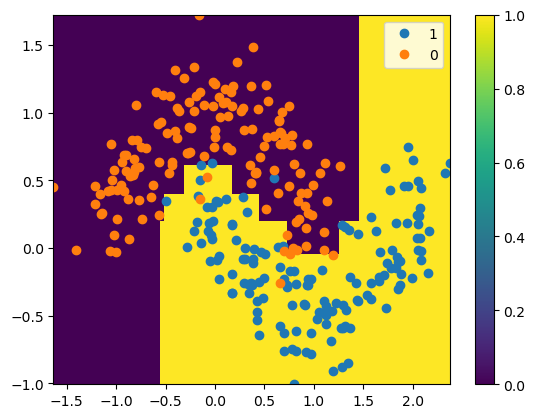

PyObject <matplotlib.colorbar.Colorbar object at 0x7fcfc98ffeb0>

In [13]:
cls_tree = ClassificationTree(X, y, giniindex, TreeStoppingRule(40, 2))
plot_result(cls_tree, X, y)

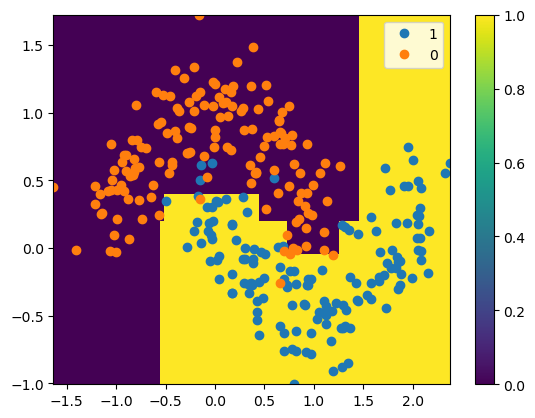

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd038250c10>

In [14]:
cls_tree = ClassificationTree(X, y, giniindex, TreeStoppingRule(40, 4))
plot_result(cls_tree, X, y)

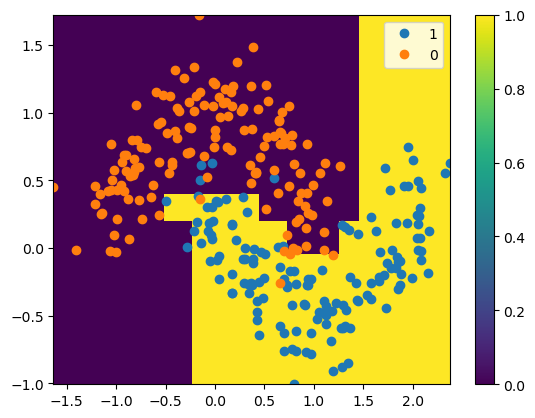

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd03830a040>

In [15]:
cls_tree = ClassificationTree(X, y, giniindex, TreeStoppingRule(40, 6))
plot_result(cls_tree, X, y)

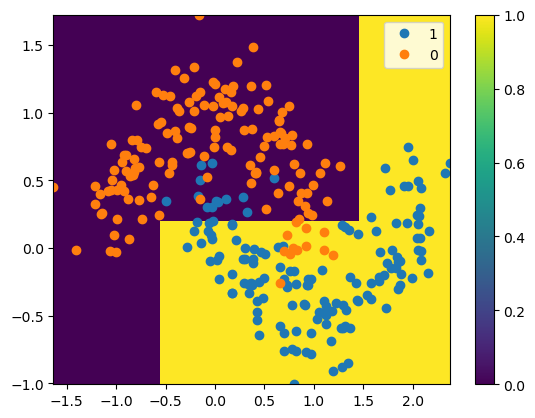

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd0117a6790>

In [16]:
cls_tree = ClassificationTree(X, y, giniindex, TreeStoppingRule(3, 2))
plot_result(cls_tree, X, y)

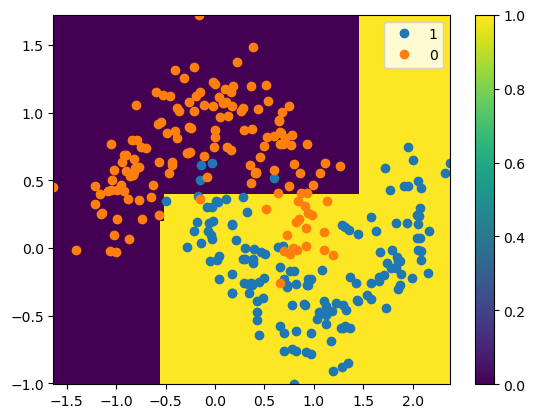

PyObject <matplotlib.colorbar.Colorbar object at 0x7fcfd1d99820>

In [17]:
cls_tree = ClassificationTree(X, y, giniindex, TreeStoppingRule(5, 2))
plot_result(cls_tree, X, y)

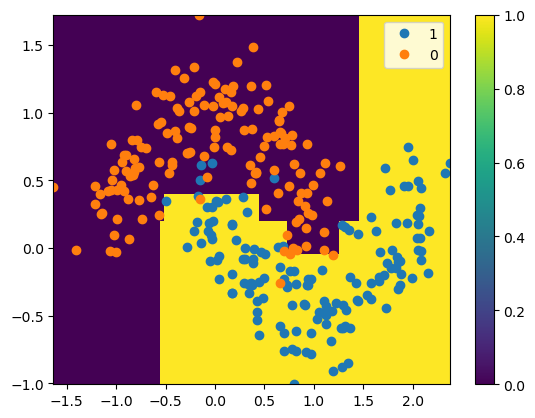

PyObject <matplotlib.colorbar.Colorbar object at 0x7fcfb006e850>

In [18]:
cls_tree = ClassificationTree(X, y, giniindex, TreeStoppingRule(6, 2))
plot_result(cls_tree, X, y)

## `RegressionTree`

In [19]:
X = [[1.0 1.0]; [2.0 1.5]; [3.0 1.7]; [4.0 2.0];[5.0 3.5]; [6.0 4.0]; [7.0 4.5]]
y = [1, 2, 3, 4, 5, 6, 7]

7-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
 7

In [20]:
regtree = RegressionTree(X, y, squaredloss, TreeStoppingRule(3, 1))

RegressionTree(RegressionNode(1, false, nothing, nothing, 1, 3.5, RegressionNode(2, false, nothing, nothing, 1, 1.5, RegressionNode(3, true, 1, 1.0, nothing, nothing, nothing, nothing), RegressionNode(3, true, 2, 2.5, nothing, nothing, nothing, nothing)), RegressionNode(2, false, nothing, nothing, 1, 5.5, RegressionNode(3, true, 3, 4.5, nothing, nothing, nothing, nothing), RegressionNode(3, true, 4, 6.5, nothing, nothing, nothing, nothing))), squaredloss, TreeStoppingRule(3, 1), 4)

In [21]:
predict(regtree, X)

7-element Array{Float64,1}:
 1.0
 2.5
 2.5
 4.5
 4.5
 6.5
 6.5